# Connectivity

### Triad Closure (Clustering)
- measures the degree to which nodes in a network tend to 'Cluster' of form triangles

- Local clustering coefficient of a node
  - Fraction of pairs of the node's friends that are friends with each other

Local clustering coefficient of node F: 0.3333333333333333
Local clustering coefficient of node A: 1.0
Local clustering coefficient of node J: 0


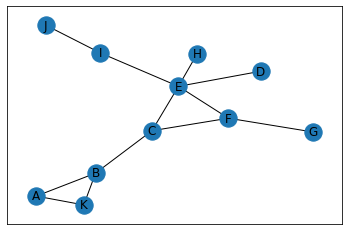

In [48]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('B', 'C'), ('B', 'K'),
('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'),('E', 'I'), ('F', 'G'), ('I', 'J')])

print('Local clustering coefficient of node F: {}'.format(nx.clustering(G, 'F')))
print('Local clustering coefficient of node A: {}'.format(nx.clustering(G, 'A')))
print('Local clustering coefficient of node J: {}'.format(nx.clustering(G, 'J')))

nx.draw_networkx(G, with_labels=True)

- Global Clustering coefficient:
  - Approach 1 - Average local clustering coefficient over all nodes
  - Approach 2 - Percentage of open triads that are triangles in a network (`Transitivity`):
    - 3*Number of closed triads
      /Number of open triads

In [49]:
nx.average_clustering(G)
print('Global clustering coefficient by Approach 1: {}'.format(nx.average_clustering(G)))
print('Global clustering coefficient by Approach 2 (or Transitivity): {}'.format(nx.transitivity(G)))

Global clustering coefficient by Approach 1: 0.28181818181818186
Global clustering coefficient by Approach 2 (or Transitivity): 0.2727272727272727


Transitivity penalize nodes with largest degree

### Distance measures

- How far a node is for another?
- Are nodes far away or close to each other?
- Which nodes are 'closest' and 'farthest' to other nodes?

The distance between two nodes is the shortest path

In [50]:
display(
    nx.shortest_path(G, 'A', 'H'),
    nx.shortest_path_length(G, 'A', 'H'))

['A', 'B', 'C', 'E', 'H']

4

Find distance from node A to every other node
- `Breadth-First Search`: A systematic and efficient procedure for computing distances from a node to all other nodes in a large network by "discoverying" nodes in layers
  - Build a Distance Tree

In [51]:
T = nx.bfs_tree(G, 'A')
print(T.edges())
print('All the distances from node A: {}'.format(nx.shortest_path_length(G, 'A')))

[('A', 'K'), ('A', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('F', 'G'), ('I', 'J')]
All the distances from node A: {'A': 0, 'B': 1, 'K': 1, 'C': 2, 'E': 3, 'F': 3, 'D': 4, 'G': 4, 'H': 4, 'I': 4, 'J': 5}


How to characterize the distance between all pairs of nodes in a graph?

- `Average distance` between pair of nodes

In [52]:
print('They are {} distant for each other'.format(nx.average_shortest_path_length(T)))

They are 0.6545454545454545 distant for each other


- `Diameter` are the maximum distance between any pair of nodes

In [53]:
nx.connected_components(G)

<generator object connected_components at 0x00000260554EC7B0>

In [57]:
nx.diameter(G)

5

- `eccentricity` of a node 'n' is the largest distance between 'n' and all other nodes
  - `radius` is the minimum eccentricity

In [58]:
display(
    nx.eccentricity(G),
    nx.radius(G))

{'A': 5,
 'K': 5,
 'B': 4,
 'C': 3,
 'E': 3,
 'F': 3,
 'D': 4,
 'H': 4,
 'I': 4,
 'G': 4,
 'J': 5}

3

- `Perifery` of a Graph is the set of nodes that have eccentricity equal to Diameter

In [59]:
print('Which nodes are the farthest ones?')
print(nx.periphery(G))

Which nodes are the farthest ones?
['A', 'K', 'J']


- `Center` of a graph is the set of nodes that have eccentricity equal to radius 

In [60]:
nx.center(G)

['C', 'E', 'F']

karate club friendship

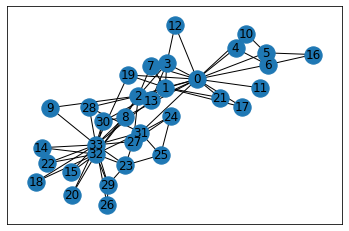

In [66]:
K = nx.karate_club_graph()
k = nx.convert_node_labels_to_integers(K, first_label=1)
nx.draw_networkx(K)

## Connected Components

- Is a subset of nodes such as:
  1. Every node in the subset has a path to every other node
  2. No other node has a path to any node in the subset 

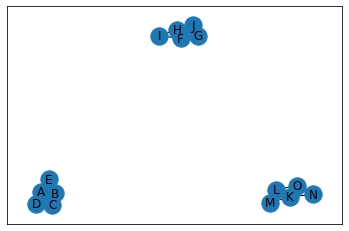

In [69]:
G = nx.Graph([('A','B'),('A','C'),('A','D'),('A','E'),('B','C'),('B','D'),('B','E'),('C','D'),
            ('F','G'),('F','H'),('F','I'),('F','J'),('G','H'),('G','J'),('H','I'),('H','J'),
            ('K','L'),('K','O'),('K','M'),('K','N'),('L','M'),('L','O'),('N','O')])

nx.draw_networkx(G)

In [74]:
display(
    print('How many connected componet has the graph? {}'.format(nx.number_connected_components(G))),
    print('Which one are the connected components? {}'.format(sorted(nx.connected_components(G)))),
    print('The M node integrate which connected component? {}'.format(nx.node_connected_component(G, 'M')))
)

How many connected componet has the graph? 3
Which one are the connected components? [{'C', 'D', 'A', 'B', 'E'}, {'G', 'H', 'J', 'I', 'F'}, {'O', 'K', 'M', 'N', 'L'}]
The M node integrate which connected component? {'O', 'K', 'M', 'N', 'L'}


None

None

None

### Connectivity in Direct Graphs

1. Directed graph is Strongly connected if, for every pair of nodes 'u' and 'v', there is a directed path from 'u' to 'v' and a directed path from 'v' to 'u'

- use:
`nx.is_strongly_connected(G)`

2. A Directed graph is Weakly connected if replacing all directed edges with undirected edges produces a connected undirected Graph

- use:
`nx.is_weakly_connected(G)`

To find the strongly connected nodes, use:
- `sorted(nx.strongly_connected_components(G))`

## Connectivity and Robustness in Networks

- Robustness: The ability of network maintain its general structural properties when it faces failures or attacks

What is the smallest number of nodes that can be removed in order to disconnect a graph?

- use: `nx.node_connectivity(G)`

which node?

- use: `nx.minimum_node_cut(G)`

What is the smallest number of nodes that can be removed in order to disconnect a graph?

- use: `nx.edge_connectivity(G)`

which edges?

- use: `nx.minimum_edge_cut(G)`

Robust networks have large minimum node and edge cuts

### For direct networks

What the options that a node 'n' have to reach a node 'p' ?

- use: `sorted(nx.all_simples_path(G, 'n', 'p'))`

if we want to block a interaction between node 'n' and 'p' by removing nodes, how many nodes would we need to remove?

- use: `nx.node_connectivity(G,'n','p')`

which one?

- use: `nx.minimum_node_cut(G, 'n', 'p')`

None

0.7

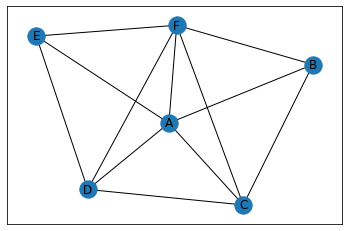

In [77]:
G = nx.Graph([('A','B'),('A','E'),('A','F'),('A','C'),('A','D'),('B','C'),('B','F'),('C','D'),('C','F'),
('D','F'),('D','E'),('E','F')])

display(
nx.draw_networkx(G),
nx.clustering(G, 'F')
)

None

2

4

['D', 'E']

['A', 'F']

3

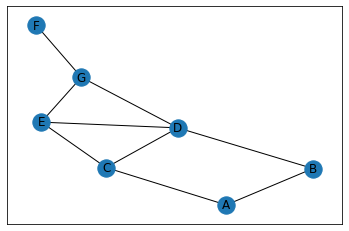

In [90]:
G = nx.Graph([('A','B'),('A','C'),('B','D'),('C','D'),('C','E'),
('D','E'),('D','G'),('E','G'),('G','F')])
T = nx.bfs_tree(G, 'A')
display(
nx.draw_networkx(G),
nx.radius(G),
nx.diameter(G),
nx.center(G),
nx.periphery(G),
nx.eccentricity(G, 'C')
)

In [92]:
nx.shortest_path_length(T,'A')

{'A': 0, 'C': 1, 'B': 1, 'E': 2, 'D': 2, 'G': 3, 'F': 4}

In [93]:
A = nx.DiGraph([('A', 'B'),('A', 'C'),('C', 'B'),('B', 'C'),('D', 'C'),('E', 'B')])
B = nx.DiGraph([('A', 'B'),('B', 'A'),('B', 'C'),('A', 'C'),('C', 'A'),('A', 'D'),('D', 'E'),('E', 'C')])
C = nx.DiGraph([('B', 'A'),('A', 'C'),('C', 'B'),('A', 'D')])

display(
nx.is_strongly_connected(A),
nx.is_strongly_connected(B),
nx.is_strongly_connected(C)
)

False

True

False

In [95]:
A.add_edge('C', 'D')
nx.is_strongly_connected(A)

False